In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

c:\Users\82106\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\82106\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_csv('C:/Users/82106/Desktop/안산 공모전/데이터/경기도 안산시_공공하수처리시설 방류수질농도 현황_20240722.csv', encoding='cp949')

In [7]:
df

,처리장명,계열,생화학적산소요구량(BOD(mg_L)),총유기탄소량(TOC(mg_L)),부유물질량(SS(mg_L)),총질소(T-N(mg_L)),총인(T-P(mg_L)),대장균(개_mL),측정일(1주간)
0,공공하수1처리장,생활계열,0.3,4.1,2.1,3.311,0.443,4,2024-07-21
1,공공하수1처리장,공장계열,1.3,8.3,2.4,5.026,0.968,53,2024-07-21
2,공공하수2처리장,생활계열,1.1,3.7,1.5,5.777,0.399,6,2024-07-21
3,대부하수처리장,생활계열,0.3,2.5,0.3,3.453,0.256,25,2024-07-21
4,공공하수1처리장,생활계열,0.5,4.8,1.8,2.924,0.233,5,2024-06-30
...,...,...,...,...,...,...,...,...,...
183,대부하수처리장,생활계열,2.5,6.0,1.0,5.847,0.924,4,2020-10-25
184,공공하수1처리장,생활계열,2.6,7.8,2.8,6.959,0.564,10,2020-09-27
185,공공하수1처리장,공장계열,4.2,14.0,6.0,8.350,1.019,34,2020-09-27
186,공공하수2처리장,생활계열,3.2,7.0,2.6,6.932,0.534,12,2020-09-27


In [25]:
df['측정일(1주간)'] = pd.to_datetime(df['측정일(1주간)'])
df['연월'] = df['측정일(1주간)'].dt.to_period('M')

criteria = {
    '생화학적산소요구량(BOD(mg_L))': 10,
    '총유기탄소량(TOC(mg_L))': 25,
    '부유물질량(SS(mg_L))': 10,
    '총질소(T-N(mg_L))': 20,
    '총인(T-P(mg_L))': 0.5
}

monthly_mean = df.groupby('연월')[list(criteria.keys())].mean()

monthly_mean.head()

,생화학적산소요구량(BOD(mg_L)),총유기탄소량(TOC(mg_L)),부유물질량(SS(mg_L)),총질소(T-N(mg_L)),총인(T-P(mg_L))
연월,,,,,
2020-09,3.150,8.925,3.125,7.35625,0.75700
2020-10,3.125,8.800,3.025,8.98675,0.85725
2020-11,3.225,8.775,2.975,8.30050,0.72700
2020-12,3.125,9.225,3.000,8.47025,0.74225
2021-01,3.025,8.200,3.200,7.29400,0.65125


In [30]:
#한글폰트
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf' 
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

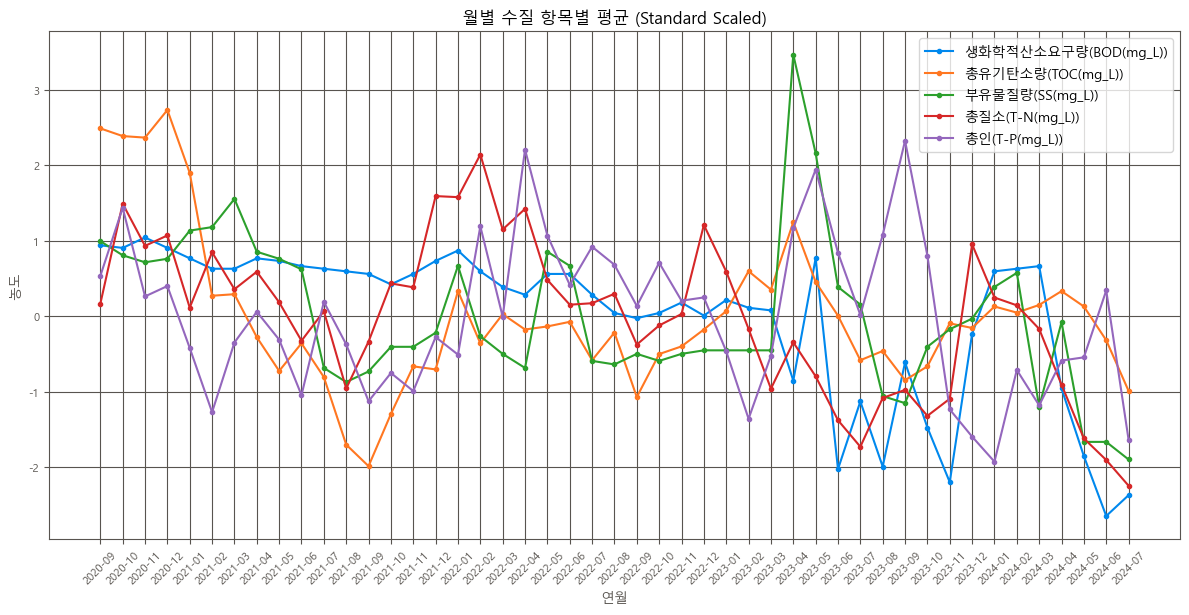

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd

monthly_mean_plot = monthly_mean.copy()

# x축 라벨을 yy/MM로 변환
if isinstance(monthly_mean_plot.index, pd.PeriodIndex):
    x_labels = [f"{i.year % 100:02d}/{i.month:02d}" for i in monthly_mean_plot.index]
else:
    x_labels = list(monthly_mean_plot.index)

# 스케일링
scaler = StandardScaler()
scaled = scaler.fit_transform(monthly_mean_plot)
scaled_df = pd.DataFrame(scaled, columns=monthly_mean_plot.columns, index=x_labels)

plt.figure(figsize=(12, 6))
for col in scaled_df.columns:
    plt.plot(
        scaled_df.index.to_list(),      # x축: yy/MM 문자열
        scaled_df[col].to_numpy(),      # y축: 스케일된 값
        marker='o',
        label=col
    )

plt.title("월별 수질 항목별 평균 (Standard Scaled)")
plt.xlabel("연월")
plt.ylabel("농도")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

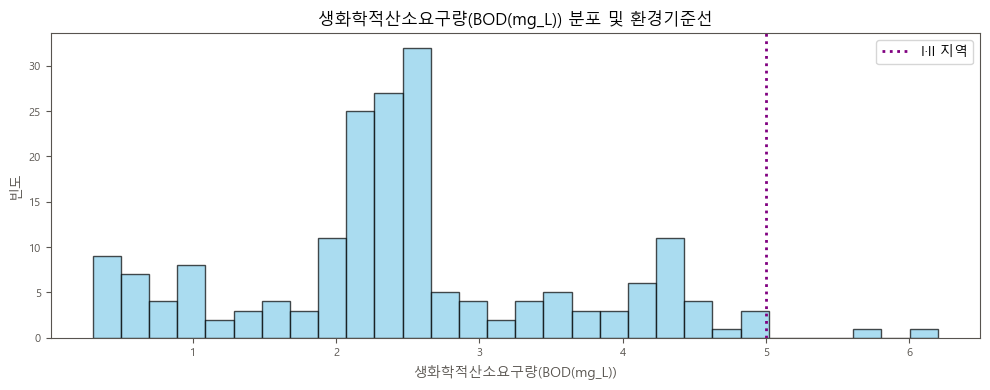

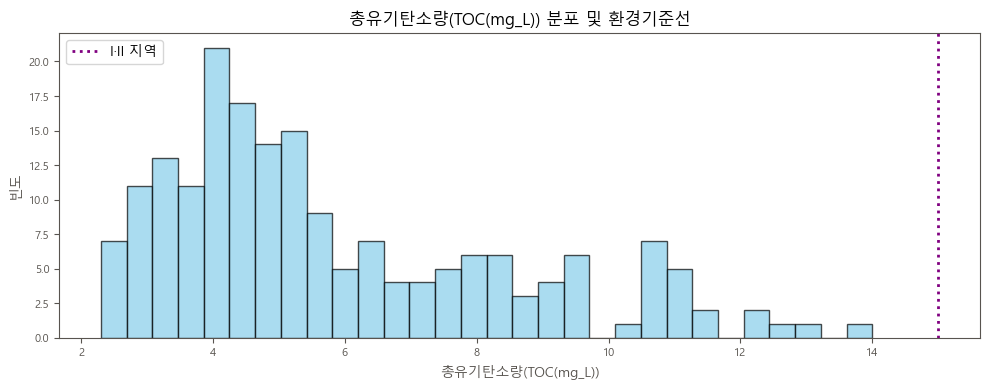

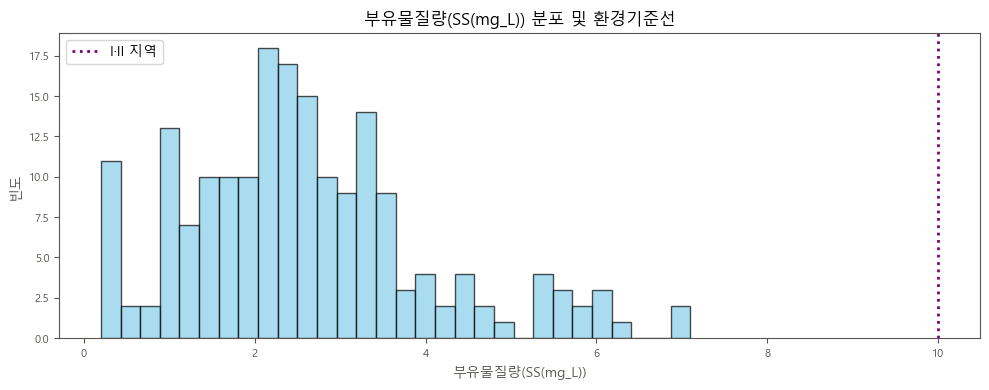

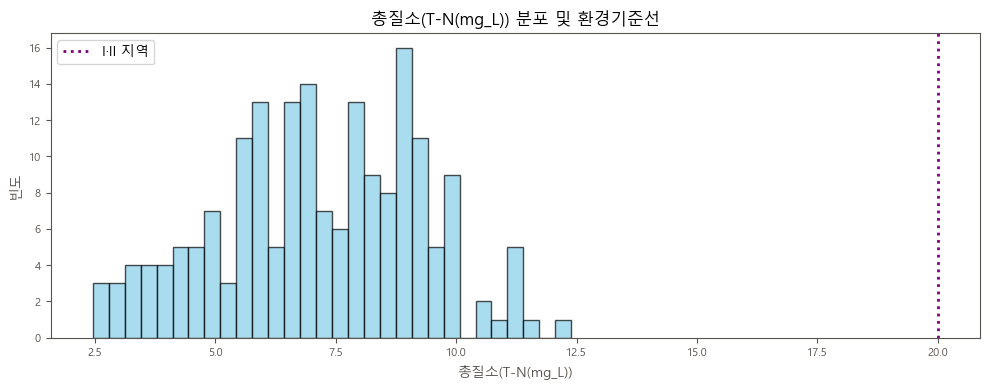

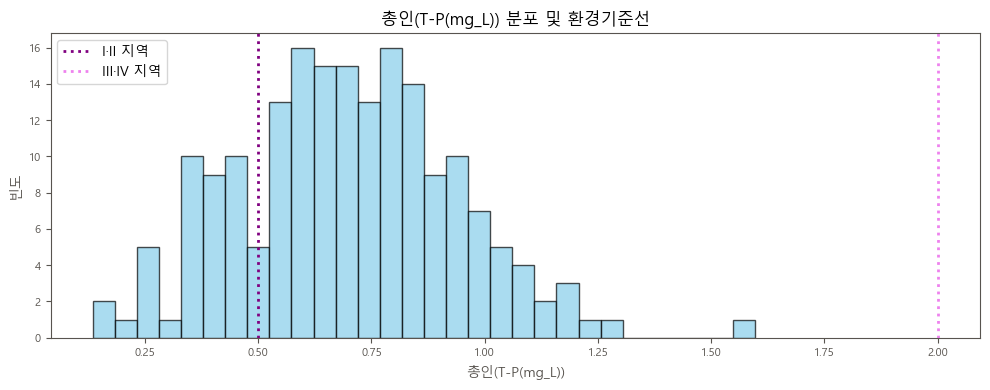

In [51]:
import matplotlib.pyplot as plt

cols = [
    '생화학적산소요구량(BOD(mg_L))',
    '총유기탄소량(TOC(mg_L))',
    '부유물질량(SS(mg_L))',
    '총질소(T-N(mg_L))',
    '총인(T-P(mg_L))'
]

# III·IV 지역 환경 기준값
criteria = {
    '생화학적산소요구량(BOD(mg_L))': 5,
    '총유기탄소량(TOC(mg_L))': 15,
    '부유물질량(SS(mg_L))': 10,
    '총질소(T-N(mg_L))': 20,
    '총인(T-P(mg_L))': (0.5, 2)  # 총인은 구간(0.5~2)으로 처리
}

for col in cols:
    plt.figure(figsize=(10,4))
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='k', alpha=0.7)

    #환경 기준선 표시
    if col == '총인(T-P(mg_L))':
        #총인은 구간표시
        plt.axvline(criteria[col][0], color='purple', linestyle=':', linewidth=2, label='I·II 지역')
        plt.axvline(criteria[col][1], color='violet', linestyle=':', linewidth=2, label='III·IV 지역')
    else:
        plt.axvline(criteria[col], color='purple', linestyle=':', linewidth=2, label='I·II 지역')

    plt.title(f"{col} 분포 및 환경기준선")
    plt.xlabel(col)
    plt.ylabel("빈도")
    plt.legend()
    plt.tight_layout()
    plt.show()

### 처리장명 별 총인 분포 시각화

<Figure size 1600x600 with 0 Axes>

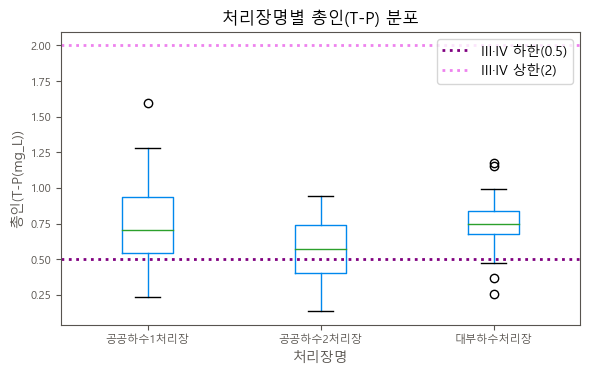

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
df.boxplot(column='총인(T-P(mg_L))', by='처리장명', grid=False)
plt.axhline(0.5, color='purple', linestyle=':', linewidth=2, label='III·IV 하한(0.5)')
plt.axhline(2, color='violet', linestyle=':', linewidth=2, label='III·IV 상한(2)')
plt.title('처리장명별 총인(T-P) 분포')
plt.suptitle('')
plt.xlabel('처리장명')
plt.ylabel('총인(T-P(mg_L))')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

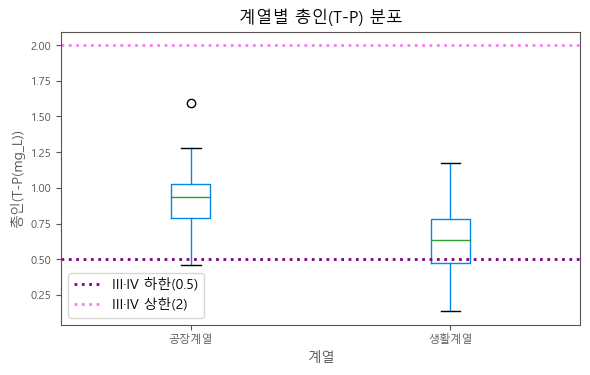

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df.boxplot(column='총인(T-P(mg_L))', by='계열', grid=False)
plt.axhline(0.5, color='purple', linestyle=':', linewidth=2, label='III·IV 하한(0.5)')
plt.axhline(2, color='violet', linestyle=':', linewidth=2, label='III·IV 상한(2)')
plt.title('계열별 총인(T-P) 분포')
plt.suptitle('')
plt.xlabel('계열')
plt.ylabel('총인(T-P(mg_L))')
plt.legend()
plt.tight_layout()
plt.show()

**주로 총인의 함유량이 높으며, 주로 초지동에 있는 공공하수처리장 과 공장계열의 총인 함유량이 높다.** 

### 데이터 병합

In [9]:
# merged_data.csv 파일 불러오기
merged_data = pd.read_csv('merged_data.csv', encoding='utf-8-sig')

In [10]:
# merged_data에 '하수처리장' 컬럼 생성 및 값 할당
merged_data['하수처리장'] = 0

# 초지동에 2, 대부동에 1 할당
merged_data.loc[merged_data['동'] == '초지동', '하수처리장'] = 2
merged_data.loc[merged_data['동'] == '대부동', '하수처리장'] = 1

In [11]:
merged_data

,동,음식물 폐기물 총무게,대형폐기물 관리주소 개수,토양오염 관리시설 개수,하천 점용 개수,하수처리장
0,고잔동,3145708.8,132.0,3.0,0,0
1,대부동,5703940.0,560.0,12.0,0,1
2,반월동,1239451.2,92.0,5.0,1,0
3,백운동,2176200.0,106.7,0.0,0,0
4,본오동,2502583.2,301.0,4.0,0,0
5,부곡동,1739120.8,109.0,3.0,0,0
6,사동,5834368.8,232.0,7.0,0,0
7,선부동,4966509.6,183.0,9.0,0,0
8,성포동,2664230.4,22.0,42.0,0,0
9,안산동,147888.0,86.0,28.0,1,0
